In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [145]:
df = pd.read_csv("Data scientist jobs in 2021.csv")

In [147]:
df.head()

,index,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000,1984,Other Organization,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,Company - Private,...,0,0,0,0,0,0,0,data scientist,na,na


In [104]:
df.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Rating', 'Company Name',
       'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'Competitors', 'Hourly',
       'Employer provided', 'Lower Salary', 'Upper Salary', 'Avg Salary(K)',
       'company_txt', 'Job Location', 'Age', 'Python', 'spark', 'aws', 'excel',
       'sql', 'sas', 'keras', 'pytorch', 'scikit', 'tensor', 'hadoop',
       'tableau', 'bi', 'flink', 'mongo', 'google_an', 'job_title_sim',
       'seniority_by_title', 'Degree'],
      dtype='object')

In [106]:
df.shape

(742, 41)

# Almost glancing through the column list, we decided to drop few columns which are less significant.

In [108]:
cols_to_drop = [
    'Company Name',
    'Type of ownership',
    'Competitors',
    'Hourly',
    'Employer provided',
    'job_title_sim',           
    'seniority_by_title'
]

# Dropping them safely
df_clean = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

print("Columns successfully dropped.")
print(f"Remaining columns: {len(df_clean.columns)}")
print("\nRemaining column list:\n", df_clean.columns.tolist())

Columns successfully dropped.
Remaining columns: 34

Remaining column list:
 ['index', 'Job Title', 'Salary Estimate', 'Rating', 'Location', 'Headquarters', 'Size', 'Founded', 'Industry', 'Sector', 'Revenue', 'Lower Salary', 'Upper Salary', 'Avg Salary(K)', 'company_txt', 'Job Location', 'Age', 'Python', 'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit', 'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an', 'Degree']


In [ ]:
## The unwanted columns are dropped. We can now safely proceed with the EDA steps

# The EDA steps typically include the following: 

1. Understanding the Context

2. Loading and Inspecting the Data

3. Importing the dataset into a DataFrame.

        Check the structure (df.shape, df.info()) and first few rows (df.head()).

        Identify data types (numeric, categorical, datetime, text).

        Note any missing values, duplicates, or unexpected symbols.

4. Data Cleaning

        Handling missing data (drop, impute, or flag missing values).

        Removing duplicates if necessary.

        Converting data types properly (e.g., strings → datetime, objects → category).

        Standardizing text entries (e.g., city names, job titles).

        Parse numeric values from strings (e.g., “$120k–$150k” → numeric average).

5. Univariate Analysis (Single Variable)

        Summarizing each variable individually:

        Numeric: Mean, median, variance, histogram, boxplot.

        Categorical: Frequency counts, bar charts.

        Detect outliers and distribution patterns.

6. Bivariate / Multivariate Analysis

        Exploring relationships between variables:

        Numeric–Numeric: Scatter plots, correlation matrix.

        Categorical–Numeric: Grouped boxplots, mean comparisons.

        Categorical–Categorical: Crosstab, heatmaps.

        Identifying patterns, dependencies, and potential predictors.

7. Visualization and Storytelling

        Use visual tools (histograms, boxplots, pairplots, bar charts) to summarize findings.

8. Summarizing Key Insights


In [110]:
df_clean.shape

(742, 34)

In [25]:
## We hereby notice that the columns have come to 34 from 41. After removing the unwanted columns... 
## ...we will determine if there are any unwanted elements in the columns

In [112]:
# Defining one unified list of unwanted elements
unwanted_elements = [-1, -99, -999, "na", "n/a", "none", "nan",
                     "missing", "?", "--", "-", "null", ""]

# Initializing a results dictionary
anomalies = {}

# Pre-converting unwanted elements to lowercase strings for consistent matching
unwanted_set = set([str(x).strip().lower() for x in unwanted_elements])

# Looping through all columns
for col in df_clean.columns:
    # Convert everything to lowercase strings for comparison
    col_str = df_clean[col].astype(str).str.strip().str.lower()
    
    # Identify rows containing unwanted values
    mask = col_str.isin(unwanted_set)
    
    if mask.any():
        unique_vals = df_clean.loc[mask, col].unique().tolist()
        count_vals = mask.sum()
        anomalies[col] = {
            "unwanted_values": unique_vals,
            "count": int(count_vals)
        }

# ---------- Displaying Results ----------
print(" Columns containing unwanted elements:\n")
for col, info in anomalies.items():
    print(f" {col}:")
    print(f"   Unwanted values: {info['unwanted_values']}")
    print(f"   Count: {info['count']}\n")

print(f"✅ Total affected columns: {len(anomalies)}")

 Columns containing unwanted elements:

 Headquarters:
   Unwanted values: ['-1']
   Count: 1

 Founded:
   Unwanted values: [-1]
   Count: 50

 Industry:
   Unwanted values: ['-1']
   Count: 10

 Sector:
   Unwanted values: ['-1']
   Count: 10

 Age:
   Unwanted values: [-1]
   Count: 50

 Degree:
   Unwanted values: ['na']
   Count: 383

✅ Total affected columns: 6


In [31]:
## After carefully studying we come to a conclusion that may be the blank values in Degree do not actually indicate loss of data... 
## ...but may be the companies not explicitly specifying.
## We will try to determine the percentage of null values. Lets determine if they are too less or more

In [114]:
# Columns where -1 or '-1' mean "missing"
cols_to_nan = ['Headquarters', 'Founded', 'Industry', 'Sector', 'Age']

for col in cols_to_nan:
    df_clean[col] = df_clean[col].replace([-1, '-1'], np.nan)

# For 'degree', fill 'na' with a readable category
df_clean['Degree'] = df_clean['Degree'].replace('na', 'Not Specified')

print(" Unwanted values cleaned and replaced appropriately in df_clean.")

 Unwanted values cleaned and replaced appropriately in df_clean.


In [116]:
print('\n\nChecking for Null values:\n ')
print(df_clean.isnull().sum())

print('\n\nConverting it to percentage:\n ')
round_calc = round(df_clean.isna().sum() *100/df_clean.shape[0]),2
print(round_calc)

print("\n\n Degree Column Distribution (%):\n")
degree_distribution = df_clean['Degree'].value_counts(normalize=True) * 100
print(degree_distribution.round(2))



Checking for Null values:
 
index               0
Job Title           0
Salary Estimate     0
Rating              0
Location            0
Headquarters        1
Size                0
Founded            50
Industry           10
Sector             10
Revenue             0
Lower Salary        0
Upper Salary        0
Avg Salary(K)       0
company_txt         0
Job Location        0
Age                50
Python              0
spark               0
aws                 0
excel               0
sql                 0
sas                 0
keras               0
pytorch             0
scikit              0
tensor              0
hadoop              0
tableau             0
bi                  0
flink               0
mongo               0
google_an           0
Degree              0
dtype: int64


Converting it to percentage:
 
(index              0.0
Job Title          0.0
Salary Estimate    0.0
Rating             0.0
Location           0.0
Headquarters       0.0
Size               0.0
Founded       

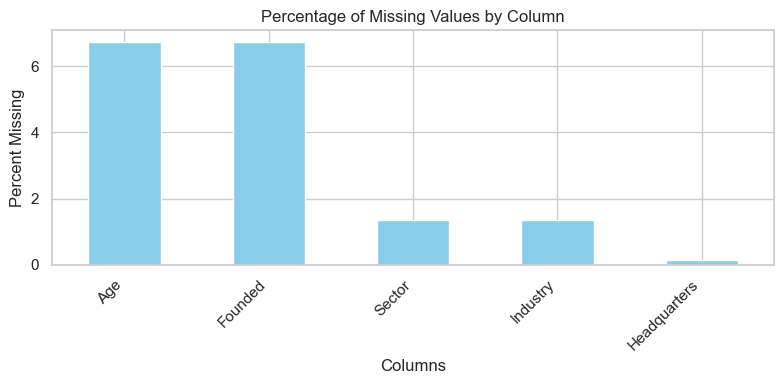

In [118]:
missing_percent = (df_clean.isna().sum() * 100 / df_clean.shape[0]).sort_values(ascending=False)
missing_percent = missing_percent[missing_percent > 0]

plt.figure(figsize=(8,4))
missing_percent.plot(kind='bar', color='skyblue')
plt.title("Percentage of Missing Values by Column")
plt.ylabel("Percent Missing")
plt.xlabel("Columns")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
## Trying to jot down the entire information for better visibility. 

In [120]:




# ----------------- Data Dimension --------------

print('The dataset by the rows and columns: ')
print('The number of rows:',df_clean.shape[0])
print('The number of columns:',df_clean.shape[1])

# ----------------- Data Columns --------------

print('\n\nListing the data columns:\n ')
print(list(df_clean.columns))


# ----------------- Data Information --------------

print('\n\nA Concise Summary of the Data present in the dataset:\n  ')
print(df_clean.info(),'\n')

# ----------------- Data Types --------------

print('\n\nWe will examine the Data Types of the dataset as well:')
print('\n',df_clean.dtypes)


# ----------------- Checking for duplicates --------------

print('\n\nDuplicate Summary:')
def datsum(c):
    if (c.duplicated().sum()==0):
        {
            print('\n\nThe Number of duplicate rows is {}'.format(c.duplicated().sum()),'\nSince the value is 0 there is nothing to delete',)
        }
    else:
        {
            print(len(c.drop_duplicates()))
        }


datsum(df_clean)

# ----------------- Checking for null values --------------
print('\n\nChecking for Null values:\n ')
print(df_clean.isnull().sum())

print('\n\nConverting it to percentage:\n ')
round_calc = round(df_clean.isna().sum() *100/df_clean.shape[0]),2
print(round_calc)

print("\n\n Degree Column Distribution (%):\n")
degree_distribution = df_clean['Degree'].value_counts(normalize=True) * 100
print(degree_distribution.round(2))

# ----------------- Checking for unique --------------

print('\n\nChecking for unique values:\n ')
print(df_clean.nunique())




The dataset by the rows and columns: 
The number of rows: 742
The number of columns: 34


Listing the data columns:
 
['index', 'Job Title', 'Salary Estimate', 'Rating', 'Location', 'Headquarters', 'Size', 'Founded', 'Industry', 'Sector', 'Revenue', 'Lower Salary', 'Upper Salary', 'Avg Salary(K)', 'company_txt', 'Job Location', 'Age', 'Python', 'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit', 'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an', 'Degree']


A Concise Summary of the Data present in the dataset:
  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            742 non-null    int64  
 1   Job Title        742 non-null    object 
 2   Salary Estimate  742 non-null    object 
 3   Rating           742 non-null    float64
 4   Location         742 non-null    object 
 5   Headquarters   

In [65]:
## Our attempt to Univariate Analysis and charts


 Numeric Columns to Visualize:
 ['Rating', 'Founded', 'Lower Salary', 'Upper Salary', 'Avg Salary(K)', 'Age', 'Python', 'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit', 'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an']

 Categorical Columns (first few): ['Job Title', 'Salary Estimate', 'Location', 'Headquarters', 'Size', 'Industry', 'Sector', 'Revenue', 'company_txt', 'Job Location']

===== Numeric Summary =====


,count,mean,std,min,25%,50%,75%,max
Rating,742.0,3.618868,0.801210,-1.0,3.3,3.7,4.0,5.0
Founded,692.0,1969.969653,54.089762,1744.0,1958.0,1992.0,2007.0,2019.0
Lower Salary,742.0,74.754717,30.945892,15.0,52.0,69.5,91.0,202.0
Upper Salary,742.0,128.214286,45.128650,16.0,96.0,124.0,155.0,306.0
Avg Salary(K),742.0,101.484501,37.482449,15.5,73.5,97.5,122.5,254.0
Age,692.0,51.030347,54.089762,2.0,14.0,29.0,63.0,277.0
Python,742.0,0.528302,0.499535,0.0,0.0,1.0,1.0,1.0
spark,742.0,0.225067,0.417908,0.0,0.0,0.0,0.0,1.0
aws,742.0,0.237197,0.425651,0.0,0.0,0.0,0.0,1.0
excel,742.0,0.522911,0.499812,0.0,0.0,1.0,1.0,1.0



===== Categorical Summary (Top 10 values each) =====


▶ Job Title
Job Title
Data Scientist               131
Data Engineer                 53
Senior Data Scientist         34
Data Analyst                  15
Senior Data Engineer          14
Senior Data Analyst           12
Lead Data Scientist            8
Marketing Data Analyst         6
Sr. Data Engineer              6
Machine Learning Engineer      5
Name: count, dtype: int64
--------------------------------------------------

▶ Salary Estimate
Salary Estimate
$49K-$113K (Glassdoor est.)         6
$86K-$143K (Glassdoor est.)         6
$54K-$115K (Glassdoor est.)         6
$21-$34 Per Hour(Glassdoor est.)    6
$74K-$124K (Glassdoor est.)         5
$76K-$142K (Glassdoor est.)         5
$107K-$173K (Glassdoor est.)        5
$81K-$167K (Glassdoor est.)         5
$68K-$139K (Glassdoor est.)         4
$63K-$105K (Glassdoor est.)         4
Name: count, dtype: int64
--------------------------------------------------

▶ Location
Location
Ne

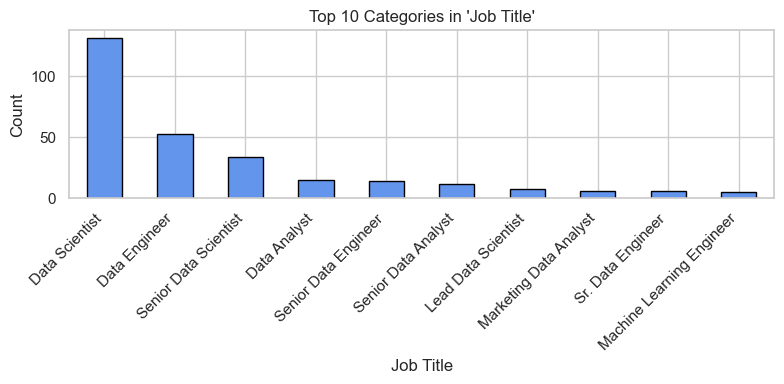

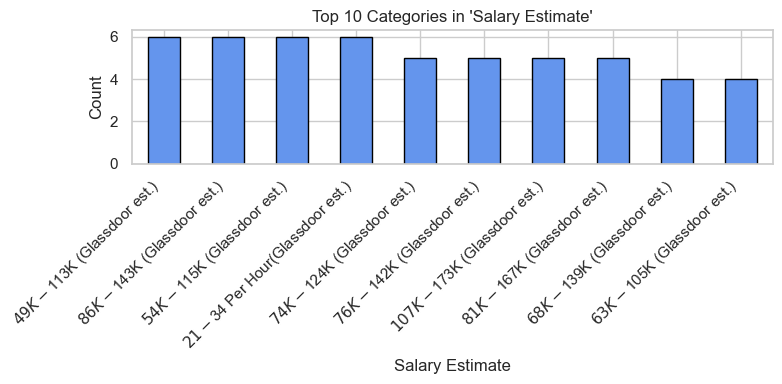

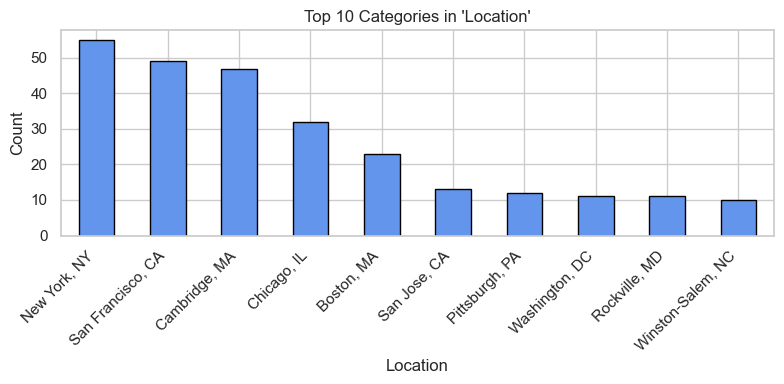

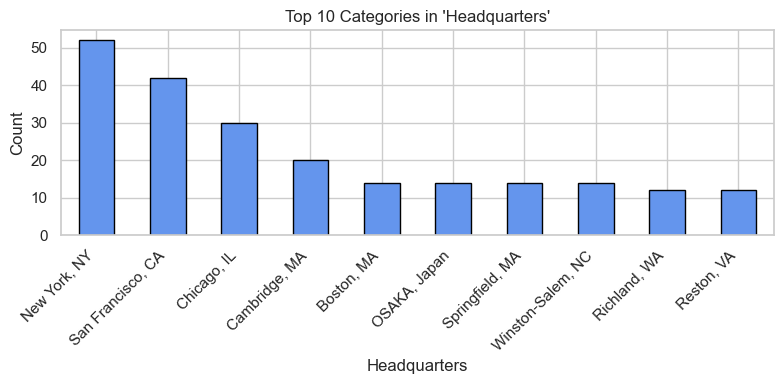

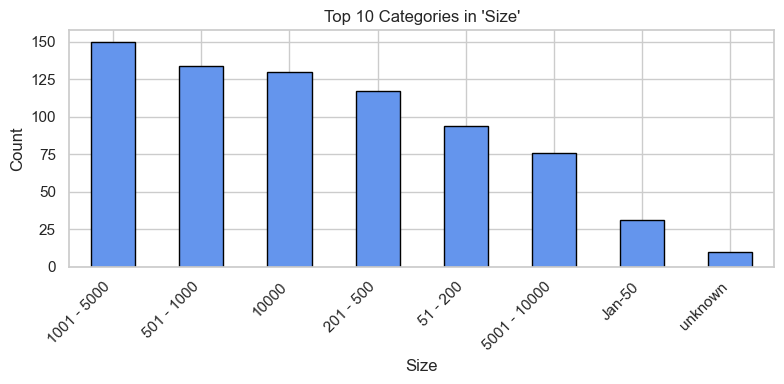

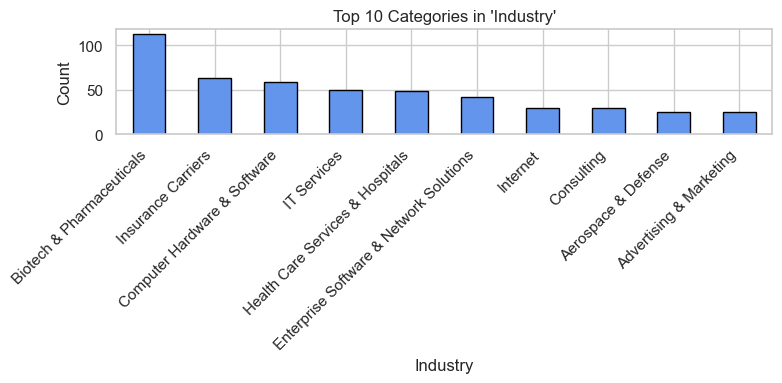

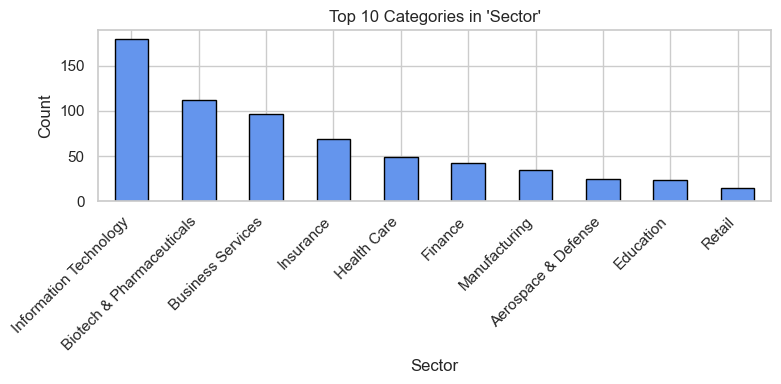

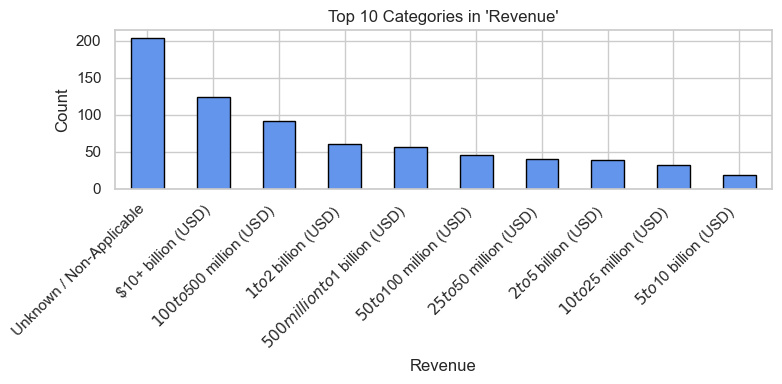

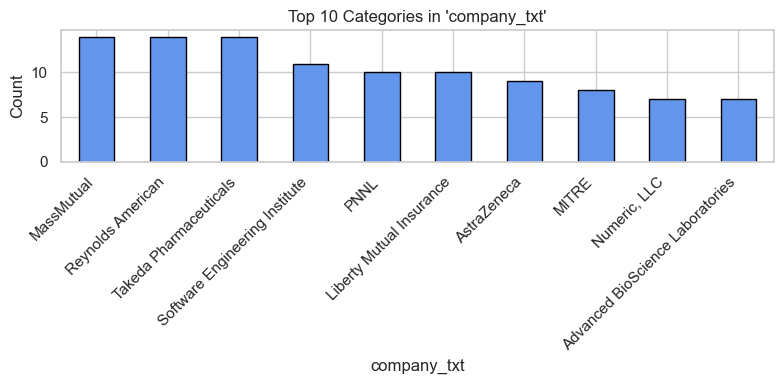

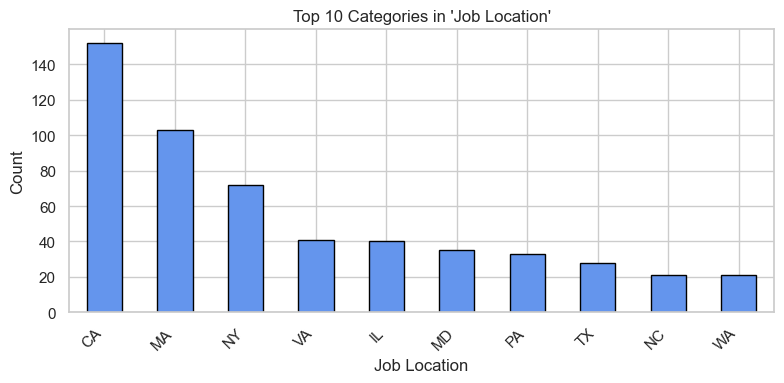

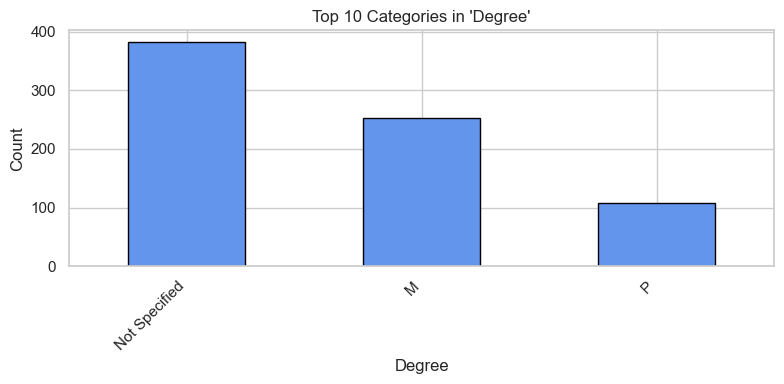

In [122]:

# 1️⃣ Identifying numeric columns
num_cols = df_clean.select_dtypes(include=["number"]).columns.tolist()

# 2️⃣ Manually excluding ID-like or derived numeric fields
exclude_cols = ['index']  
num_cols = [c for c in num_cols if c not in exclude_cols]

print("\n Numeric Columns to Visualize:\n", num_cols)

# 3️⃣ Identifying categorical columns
cat_cols = df_clean.select_dtypes(exclude=["number"]).columns.tolist()
print("\n Categorical Columns (first few):", cat_cols[:10])

# 4️⃣ Numeric summary
print("\n===== Numeric Summary =====")
display(df_clean[num_cols].describe().T)

# 5️⃣ Histograms for selected numeric columns
cols_to_plot = ['avg_salary_k', 'rating', 'lower_salary', 'upper_salary', 'age']  

for c in [col for col in cols_to_plot if col in df_clean.columns]:
    plt.figure(figsize=(6, 4))
    plt.hist(df_clean[c].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {c}")
    plt.xlabel(c)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# 6️⃣ Categorical column summaries (Top 10)
print("\n===== Categorical Summary (Top 10 values each) =====\n")
for c in cat_cols[:5]:
    print(f"\n▶ {c}")
    print(df_clean[c].value_counts().head(10))
    print("-" * 50)

# 7️⃣ Bar charts for first few categorical columns
for c in cat_cols:
    plt.figure(figsize=(8, 4))
    df_clean[c].value_counts().head(10).plot(kind="bar", color='cornflowerblue', edgecolor='black')
    plt.title(f"Top 10 Categories in '{c}'")
    plt.xlabel(c)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


In [124]:
df_clean.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Rating', 'Location',
       'Headquarters', 'Size', 'Founded', 'Industry', 'Sector', 'Revenue',
       'Lower Salary', 'Upper Salary', 'Avg Salary(K)', 'company_txt',
       'Job Location', 'Age', 'Python', 'spark', 'aws', 'excel', 'sql', 'sas',
       'keras', 'pytorch', 'scikit', 'tensor', 'hadoop', 'tableau', 'bi',
       'flink', 'mongo', 'google_an', 'Degree'],
      dtype='object')

Salary-related columns used: ['Lower Salary', 'Upper Salary', 'Avg Salary(K)']


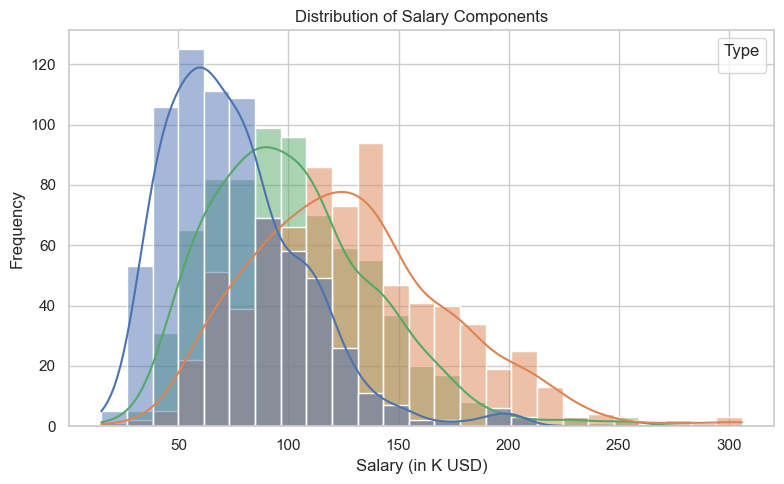

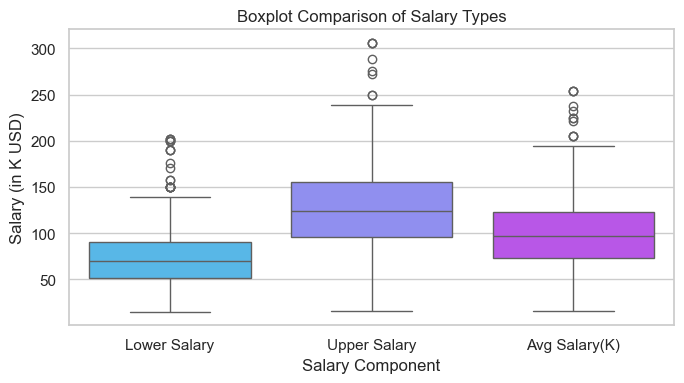

In [126]:

sns.set(style="whitegrid")

# Detect which salary columns exist and have variation
salary_cols = [c for c in ['Lower Salary', 'Upper Salary', 'Avg Salary(K)']
               if c in df_clean.columns and df_clean[c].nunique() > 1]

if len(salary_cols) >= 2:
    print("Salary-related columns used:", salary_cols)

    salary_df = df_clean[salary_cols].melt(var_name='Salary_Type', value_name='Salary_Value')

    # 1️⃣ Histogram comparison
    plt.figure(figsize=(8, 5))
    sns.histplot(data=salary_df, x='Salary_Value', hue='Salary_Type', bins=25, kde=True)
    plt.title("Distribution of Salary Components")
    plt.xlabel("Salary (in K USD)")
    plt.ylabel("Frequency")
    plt.legend(title='Type')
    plt.tight_layout()
    plt.show()

    # 2️⃣ Boxplot comparison
    plt.figure(figsize=(7, 4))
    sns.boxplot(data=salary_df, x='Salary_Type', y='Salary_Value', palette='cool')
    plt.title("Boxplot Comparison of Salary Types")
    plt.xlabel("Salary Component")
    plt.ylabel("Salary (in K USD)")
    plt.tight_layout()
    plt.show()

 
else:
    print("⚠️ Not enough salary columns with multiple elements to plot.")
    print("Check column existence or variation with:")
    print("[col for col in ['lower_salary', 'upper_salary', 'avg_salary_k'] if col in b_clean.columns]")


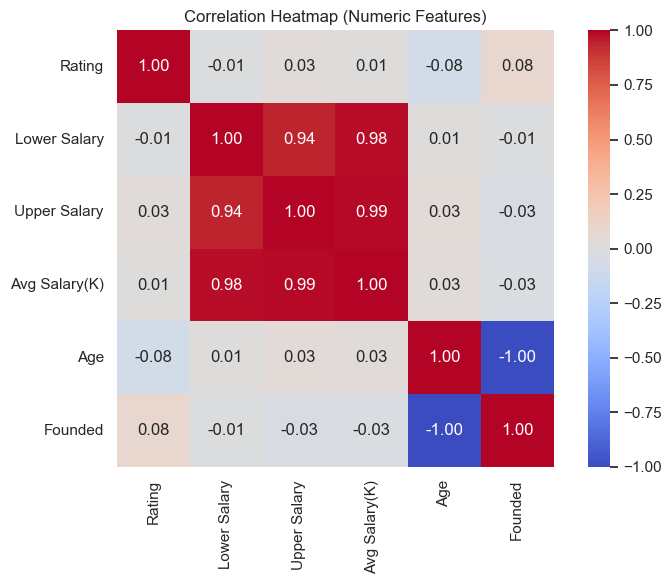

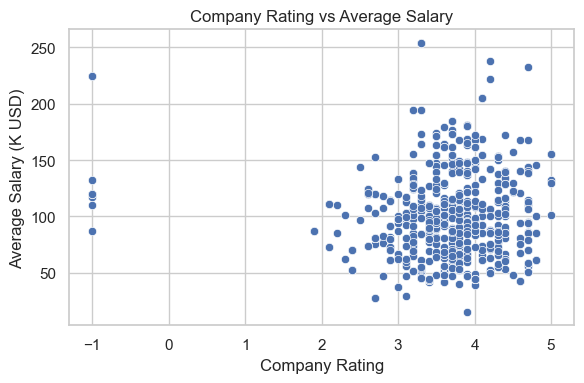

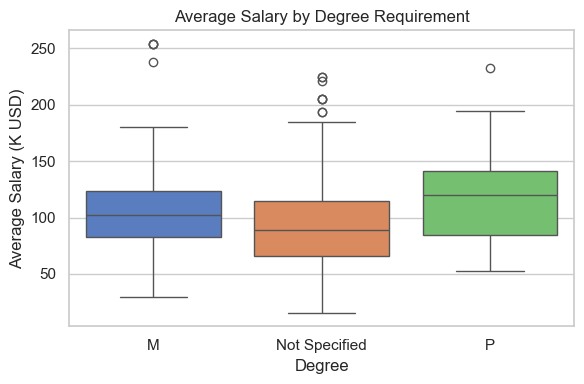

In [128]:


sns.set(style="whitegrid")

# 1 Correlation Heatmap (Numeric vs Numeric)
num_cols = ['Rating', 'Lower Salary', 'Upper Salary', 'Avg Salary(K)', 'Age', 'Founded']
corr = df_clean[num_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Heatmap (Numeric Features)")
plt.tight_layout()
plt.show()

# 2 Rating vs Avg Salary(K) — Scatter Plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Rating', y='Avg Salary(K)', data=df_clean)
plt.title("Company Rating vs Average Salary")
plt.xlabel("Company Rating")
plt.ylabel("Average Salary (K USD)")
plt.tight_layout()
plt.show()

# 3 Degree vs Avg Salary(K) — Box Plot
plt.figure(figsize=(6, 4))
sns.boxplot(x='Degree', y='Avg Salary(K)', data=df_clean, palette='muted')
plt.title("Average Salary by Degree Requirement")
plt.xlabel("Degree")
plt.ylabel("Average Salary (K USD)")
plt.tight_layout()
plt.show()


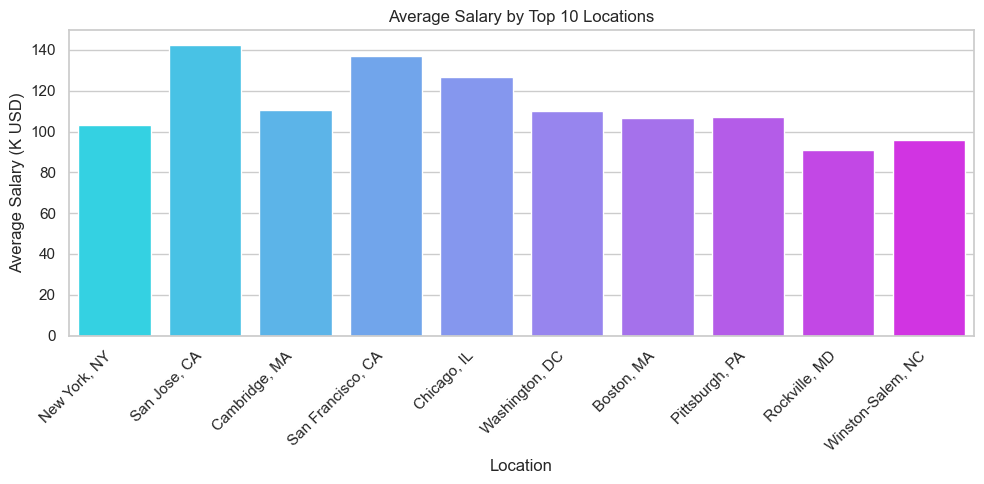

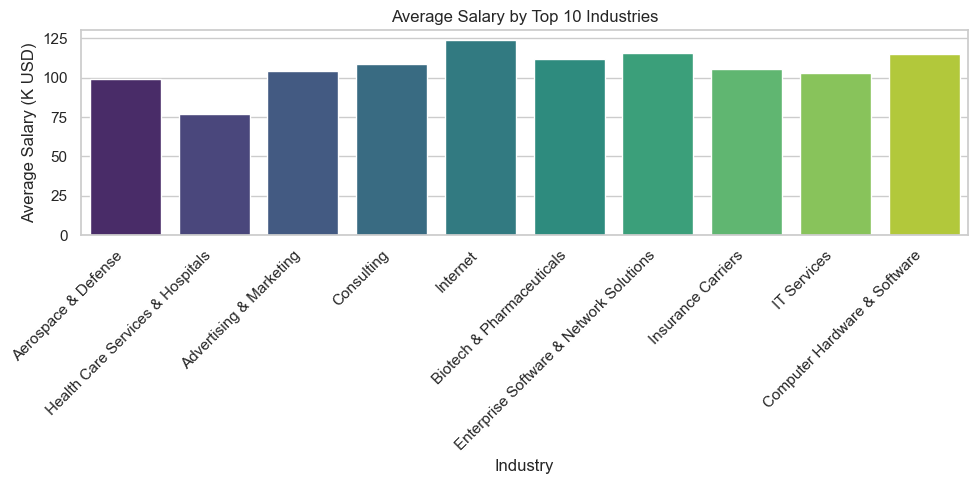

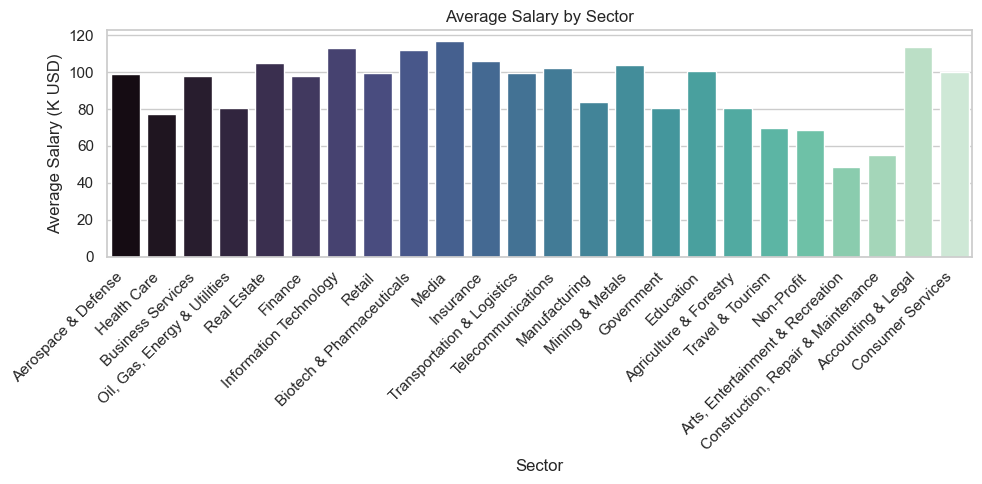

In [130]:
sns.set(style="whitegrid")

# 1️⃣ Average Salary by Top 10 Locations
top_locations = df_clean['Location'].value_counts().head(10).index
plt.figure(figsize=(10, 5))
sns.barplot(
    x='Location',
    y='Avg Salary(K)',
    data=df_clean[df_clean['Location'].isin(top_locations)],
    estimator='mean',
    ci=None,
    palette='cool'
)
plt.title("Average Salary by Top 10 Locations")
plt.xlabel("Location")
plt.ylabel("Average Salary (K USD)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2️⃣ Average Salary by Top 10 Industries
top_industries = df_clean['Industry'].value_counts().head(10).index
plt.figure(figsize=(10, 5))
sns.barplot(
    x='Industry',
    y='Avg Salary(K)',
    data=df_clean[df_clean['Industry'].isin(top_industries)],
    estimator='mean',
    ci=None,
    palette='viridis'
)
plt.title("Average Salary by Top 10 Industries")
plt.xlabel("Industry")
plt.ylabel("Average Salary (K USD)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3️⃣ Optional: Salary vs Sector
if 'Sector' in df_clean.columns:
    plt.figure(figsize=(10, 5))
    sns.barplot(
        x='Sector',
        y='Avg Salary(K)',
        data=df_clean,
        estimator='mean',
        ci=None,
        palette='mako'
    )
    plt.title("Average Salary by Sector")
    plt.xlabel("Sector")
    plt.ylabel("Average Salary (K USD)")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


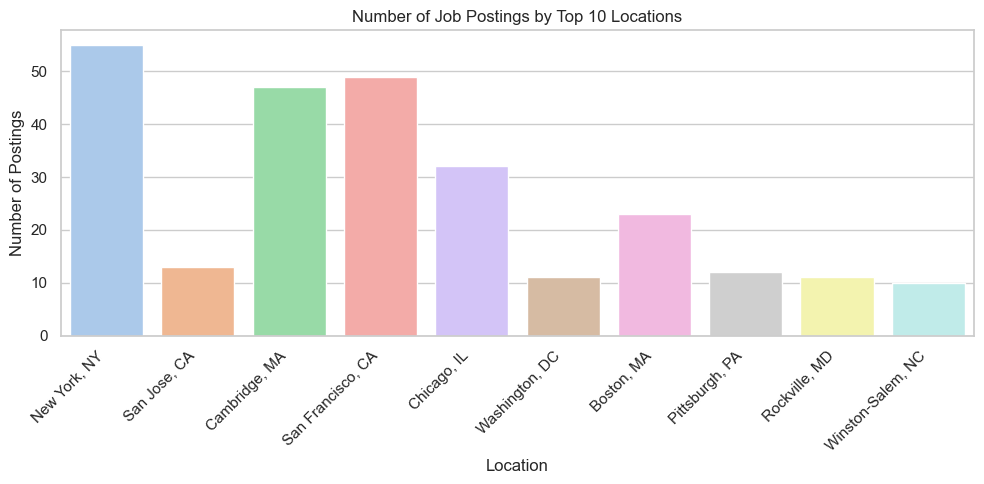

In [132]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Location', data=df_clean[df_clean['Location'].isin(top_locations)], palette='pastel')
plt.title("Number of Job Postings by Top 10 Locations")
plt.xlabel("Location")
plt.ylabel("Number of Postings")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [134]:
# 1️⃣ Top 10 industries by average salary
industry_salary = (
    df_clean.groupby("Industry")["Avg Salary(K)"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .round(2)
)
print("Top 10 Industries by Average Salary (K USD):\n")
print(industry_salary)
print("-" * 60)

# 2️⃣ Top 10 locations by average salary
location_salary = (
    df_clean.groupby("Location")["Avg Salary(K)"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .round(2)
)
print("\n Top 10 Locations by Average Salary (K USD):\n")
print(location_salary)
print("-" * 60)

# 3️⃣ (Optional) Combine both summaries into a DataFrame for export
summary_df = pd.DataFrame({
    "Top Industries": industry_salary.index,
    "Avg Salary (K)": industry_salary.values,
    "Top Locations": location_salary.index,
    "Avg Salary (K) ": location_salary.values
})
print("\n Combined Summary Table:\n")
print(summary_df)

Top 10 Industries by Average Salary (K USD):

Industry
Other Retail Stores                         163.50
Motion Picture Production & Distribution    146.00
Financial Analytics & Research              145.12
Health, Beauty, & Fitness                   139.50
Telecommunications Services                 131.50
Brokerage Services                          129.00
Auctions & Galleries                        128.00
Internet                                    123.81
Investment Banking & Asset Management       118.40
TV Broadcast & Cable Networks               117.75
Name: Avg Salary(K), dtype: float64
------------------------------------------------------------

 Top 10 Locations by Average Salary (K USD):

Location
Bellevue, WA         184.50
Lake Forest, IL      179.50
Mountain View, CA    177.19
Novato, CA           168.00
Burbank, CA          164.00
Emeryville, CA       153.00
Newark, NJ           146.00
Fort Lee, NJ         145.67
Jersey City, NJ      144.75
Saint Louis, MO      143.50
Na

In [ ]:
## Adding one Multivariate Analysis

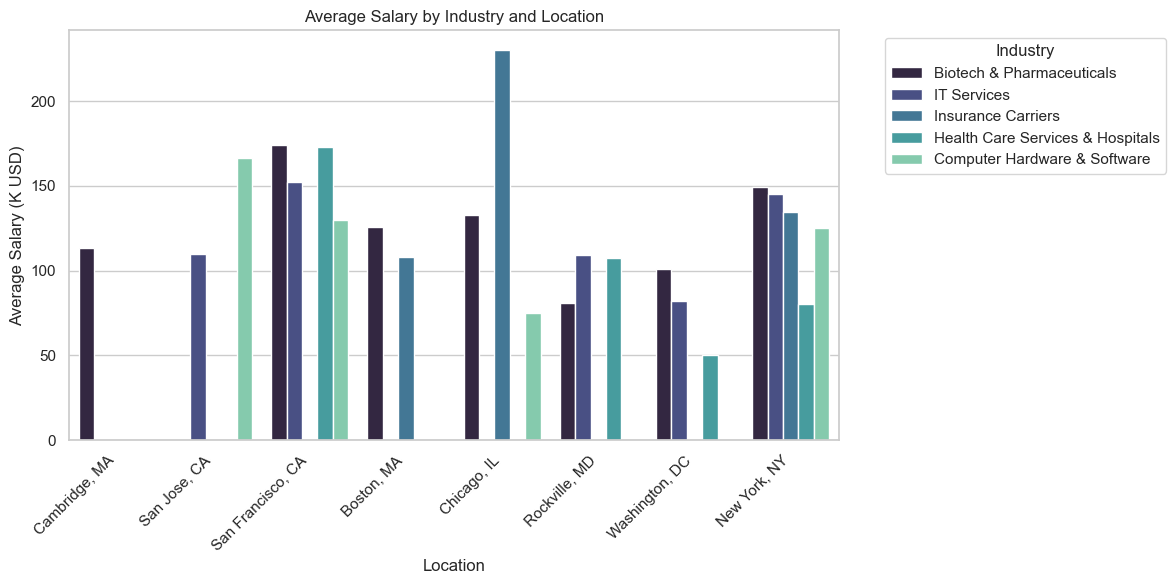

In [136]:
# Industry + Location → Average Salary (Grouped Bar)
top_locs = df_clean['Location'].value_counts().head(10).index
plt.figure(figsize=(12,6))
top_inds = df_clean['Industry'].value_counts().head(5).index
subset = df_clean[df_clean['Industry'].isin(top_inds) & df_clean['Location'].isin(top_locs)]
sns.barplot(x='Location', y='Avg Salary(K)', hue='Industry',
            data=subset, ci=None, palette='mako')
plt.title("Average Salary by Industry and Location")
plt.xlabel("Location")
plt.ylabel("Average Salary (K USD)")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Industry', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()